<a href="https://colab.research.google.com/github/23f1000208/Physics-Inspired-Machine-Learning/blob/main/CH_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🧭 How to Use This Notebook

* 🔽 **Work top-to-bottom.** Read the explanations, then run each code cell by clicking the play button ▶️
* 💡 **Don’t worry if you don’t understand everything immediately.** Machine learning takes practice!

---

# 📈 Linear Regression

## Abstract

Linear regression is the simplest, i.e., lowest order approximation, model to predict a non-categorical (continuous) quantity, for example, house prices.

🚀 By the end of this notebook, you will be able to build, evaluate, and interpret a linear regression model.

In this course, we will:
- 🧪 Work hands‑on with the California Housing dataset to predict median house value.
- 🔁 Learn the full pipeline: data loading → exploratory data analysis (EDA) → preprocessing (scaling, collinearity, outlier handling) → feature/target split → model training → evaluation → interpretation.
- 📊 Use standard evaluation metrics (MSE, MAE, R²) and visualizations to assess model performance and diagnose problems.

---


## 🛠️ Setup

In this course, we will use a few Python packages. Run the following cell to make sure they are installed.

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn scipy --quiet

---

## 📦 Imports

Let's also import all the packages that we need during the course

In [ ]:
## print Python interpreter version
import sys

print(f"Python: {sys.version.split()[0]}")
## numerical computing library
import numpy as np

## tabular data handling
import pandas as pd

## plotting backend (matplotlib)
import matplotlib.pyplot as plt

## statistical visualizations (seaborn)
import seaborn as sns

## utility to split data into train and test sets
from sklearn.model_selection import train_test_split

## linear regression estimator
from sklearn.linear_model import LinearRegression

## common regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## loader for the California housing dataset
from sklearn.datasets import fetch_california_housing

## For computing multivariate Gaussian PDF
from scipy.stats import multivariate_normal

## For computing univariate Gaussian PDF
from scipy.stats import norm

## For reading online pages
import requests

## For displaying contents
from IPython.display import Markdown, display

Python: 3.11.14


In [ ]:
## set the color themes of the figures
style = requests.get("https://compu-flair.com/notes/jupyter-color-style/raw").text
exec(style)

---

## 📊 Data

In this course, we are going to learn **linear regression** through an example. In this example, we'll use the California Housing dataset from scikit-learn to predict the median house value from features such as median income, house age, average rooms/bedrooms, population, average occupancy, and geographic coordinates (latitude and longitude).


In [ ]:
## Load the California Housing dataset from scikit-learn
housing = fetch_california_housing()


## 🔍 Explore

Let's first see what we have fetched. 🎯

In [ ]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

## 📝 Explanation of the cell

As you can see, the "housing" object is a python dictionary. 📖

* The 'data' key holds a 2D NumPy array (X) of shape (20640, 8) with one row per district and columns ordered as in 'feature_names'.
* The 'target' key holds a 1D NumPy array (y) of length 20640 with the target values 'MedHouseVal'.


## 📚 Learn more about data

🔎 We always want to learn as much about the dataset as possible. The 'DESCR' key seems to provide more info. Let's print it out.

**Specifically, we want to learn what the columns of dataset are (attribute information)**

In [ ]:
print(housing["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

## 🧾 Explanation of the printout above

* 📊 We can see that dataset has 20640 rows, i.e. the number of samples
* ℹ️ The "Attribute Information" gives the column names of the data and their explanations.

---

## 🧮 Construct our spreadsheet

In machine learning, we always start with a table that holds our data. We call it dataframe. It holds all the features, also known as attributes or predictive variables, and the target that we would like to predict.


In [ ]:
## Convert the dataset to a pandas DataFrame with feature names as columns
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

## Add the target column
housing_df["MedHouseVal"] = housing.target

## 📋 The spreadsheet

Let's now take a look at our data table, i.e. the dataframe. 👀

In [ ]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


---

## ⚖️ Scaling (Normalization)

### Change of units:

Imagine measuring the mass of apples 🍎 and oranges 🍊 but recording the apples in kilogram and oranges in grams. **Doesn't that look absurd?**

📏 In physics, we always want to work with the same unit in an entire problem. Same is true here.
Since the columns of our dataset are different in nature, the only way to make the columns comparable is to convert them all to unit-less columns. This can be done by dividing each column by some property of that column. These include the mean, the median, max value, etc. The standard approach is to divide by the standard deviation.


### Centering:

📐 Perhaps you have seen change of coordinate system in physics and other places. Usually, we want to move to a frame of reference that makes calculations easier. In machine learning, one common change of coordinates, i.e. **columns of dataset**, is to use the mean of each column ($\bar x$) as the reference point. This means, we compute the mean of each column and subtract it from each component of that column.


### Scaling (unit change + centering)

Overall, we finally work with the following dataset:

$$
x \rightarrow \frac{x-\bar x}{\text{std}(x)}
$$

In [ ]:
## let's scale the dataset
df = (housing_df - housing_df.mean()) / housing_df.std()

---

## 📊 Basic Summary Statistics

Lets now print the basic summary statistics for all numeric columns in the DataFrame. The following command will compute count, mean, standard deviation, min, 25%, 50% (median), 75%, and max for each numeric column. 📈

This gives a quick view of central tendency, spread, ranges, and potential outliers, and lets you verify non-missing counts. ✅

In [ ]:
## Print basic summary statistics for all columns in the DataFrame
print(f"\nBasic statistics:")
print(df.describe())


Basic statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04   
mean   6.609700e-17  6.609700e-17  7.711317e-17 -9.226039e-17 -1.101617e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.774256e+00 -2.196127e+00 -1.852274e+00 -1.610729e+00 -1.256092e+00   
25%   -6.881019e-01 -8.453727e-01 -3.994399e-01 -1.911670e-01 -5.637952e-01   
50%   -1.767908e-01  2.864502e-02 -8.078293e-02 -1.010626e-01 -2.291262e-01   
75%    4.592952e-01  6.642943e-01  2.519554e-01  6.015724e-03  2.644885e-01   
max    5.858144e+00  1.856137e+00  5.516190e+01  6.957003e+01  3.024960e+01   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04  
mean   3.786807e-18  2.269330e-15 -8.592610e-15 -1.762587e-16  
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
min   -2.2899

---

## 🔍 Exploratory Data Analysis (EDA)

📊 Before building any machine learning model, we would like to Observe distribution of the dataset columns. This will help us choose the right assumptions.

📉 Seaborn's pairplot function provides a squared-shaped group of sub-plots where the diagonal sub-plots are histograms of each column of dataset and off-diagonal sub-plots are two columns of dataset drawn on each of x-axis and y-axis, which shows their direct relationships.

🎯 Here, we would like to look for 1. correlations between columns and 2. outliers or unusual behaviors

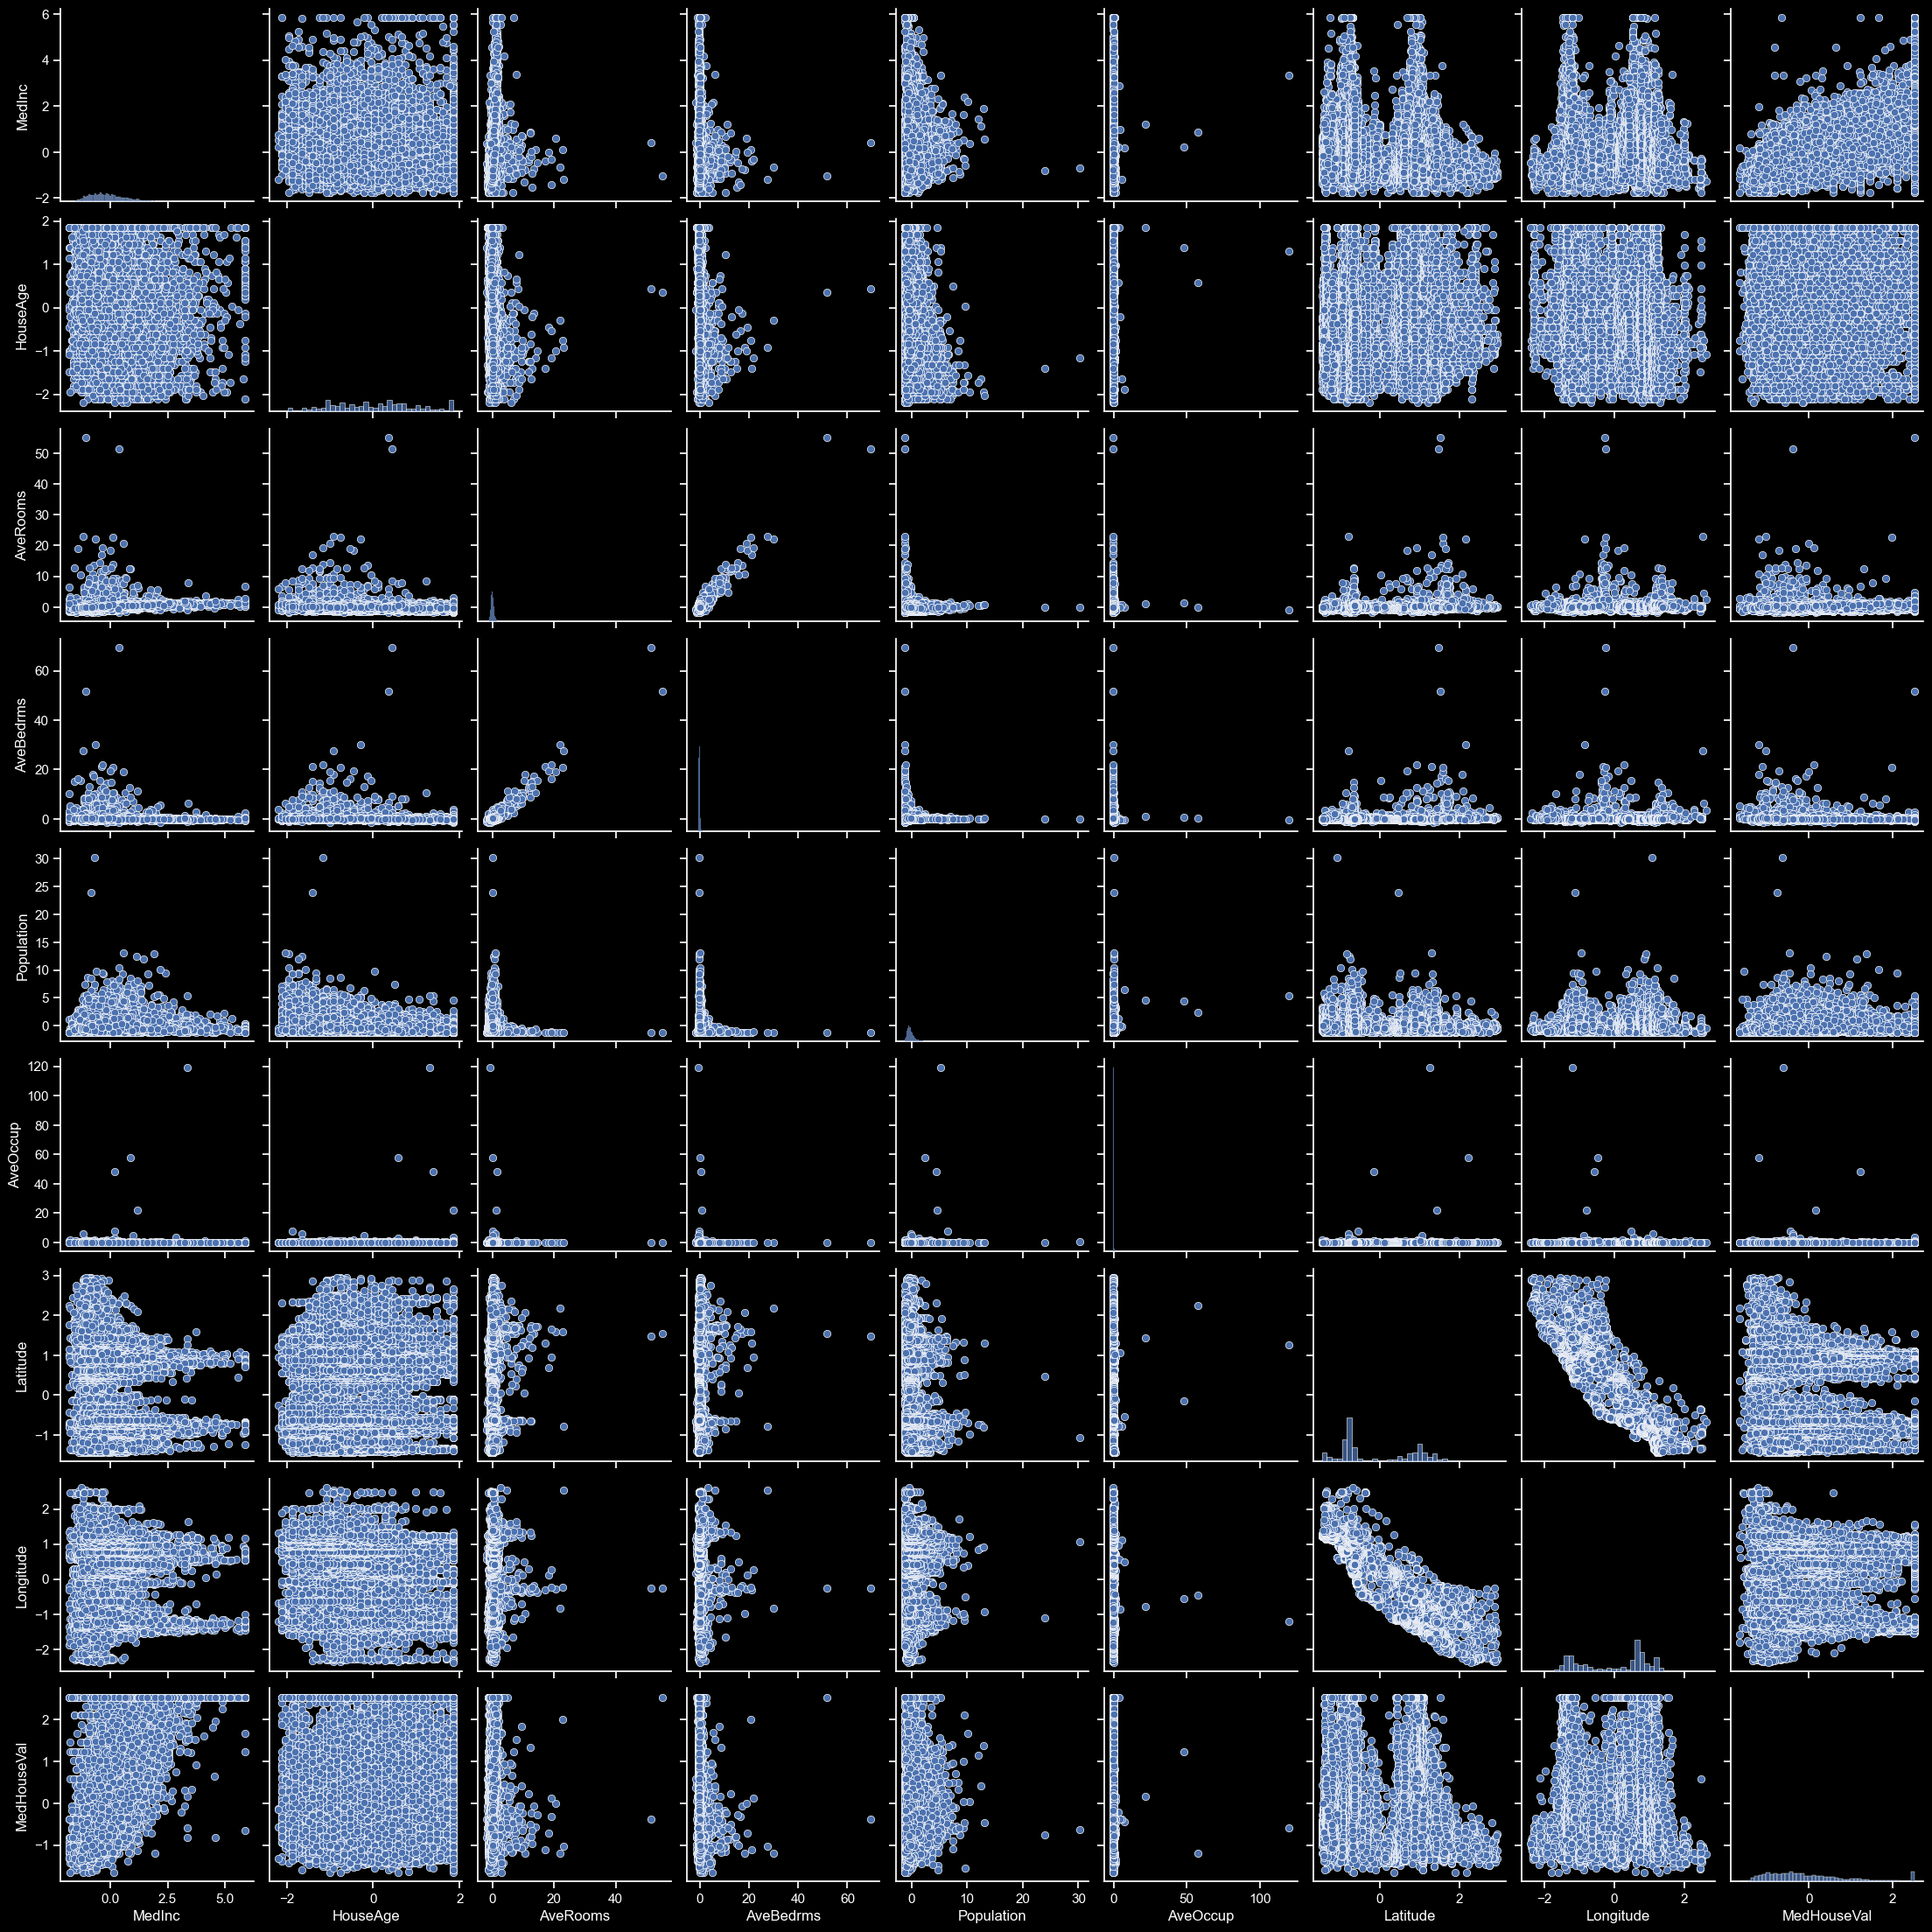

In [ ]:
sns.pairplot(df)

## 💡 Explanation of the pairplot

From this pairplot, I can see strong correlation between 'AveRooms' and 'AveBedrms' columns. Also, I see strong anti-correlation between 'Latitude' and 'Longitude' columns. 🔗

Later you see why we need to keep only one of each correlated pair. ⚠️

Note: We don't want to remove correlations between the target column and the features. We only want to remove correlations between feature columns. 📝

---

## 🎲 Probability of a dataset

### **✨ A unified approach to Machine Learning (& Physics)**

Just like in Physics, machine learning is a probability-based field.  
In machine learning, we **assume a dataset obeys a probability** of the following form:  
$$
P = \frac{e^{-F}}{Z}.
$$

Let me explain what this equation means. Both $P$ and $F$ are functions that take one row of the dataset. $P$ then spit out the probability for that row of dataset. In other words, if you measure the system (a California House in this course) one more time, how likely it is to get that row.

In this equation $Z$ is a normalization constant named the **partition function**. We don't need to know its form in this course but if you are curious, here is the equation
$$
Z \; = \sum_{\text{all possible states}} e^{-F}
$$

Also, $F$ is called **effective free energy**. Below, I'll show you its form in linear regression.

### 🤔 How are machine learning models different?

* **They have different mathematical forms for $F$**
* Their approach to find $F$'s free parameters is different

We will get to these two bullets multiple times in future courses. For now just keep these two in mind and pass.

## 📉 $F$ in Linear Regression

In this course, we assume our dataset can be described by a **linear regression**. It means, we assume the following math form for $F$:

$$
F = -\frac{1}{2} (\vec{x} - \vec{\mu}) \cdot \Sigma^{-1} \cdot (\vec{x} - \vec{\mu})
$$
* 🧮 The corresponding probability is called the **Multivariate Gaussian Distribution.**
* 🎥 You don't need to but if curious, watch this [YouTube video](https://youtu.be/iqVeZ70muyw) to see how this can be derived from first principles.
* In this equation, $\vec{x}$ refers to the rows of dataset. In other words, the first component is the first feature of that row, the second component is the second feature, etc.
* $\vec{\mu}$ is a vector and $\Sigma$ is a matrix. The components of both of them are unknown. We need to estimate them using our dataset.  
* In future courses, we will discuss how free parameters such as $\vec{\mu}$ and $\Sigma$ can be estimated using a dataset. 📚
* ✨ For now I just state them without a proof:
    * $\vec{\mu}$ = empirical mean of columns of dataset (each column corresponds to one component)
    * $\Sigma$ = empirical covariance matrix of dataset
    * Below, we use our data to compute and inspect $\vec{x}$, $\vec{\mu}$, and $\Sigma$.


### Let's look at components of $\vec{x}$ vector:

In [ ]:
# Iterate over the first 3 rows and display their values
for i in range(3):
    row_values = df.iloc[i].values
    print(f"x_{i}:\n {row_values}\n")

x_0:
 [ 2.34470896  0.98211887  0.62854423 -0.15375386 -0.97440499 -0.04959533
  1.05252278 -1.32780305  2.12957989]

x_1:
 [ 2.33218146 -0.60700421  0.32703343 -0.26332939  0.861418   -0.09250999
  1.04315928 -1.32281187  1.3141243 ]

x_2:
 [ 1.78265622  1.85613656  1.15559247 -0.04901517 -0.82075747 -0.0258419
  1.03847753 -1.33279424  1.25866292]



### Let's look at components of $\vec{\mu}$ vector:

In [ ]:
## mu vector
mu = np.mean(df, axis=0)
print(mu)

MedInc         6.609700e-17
HouseAge       6.609700e-17
AveRooms       7.711317e-17
AveBedrms     -9.226039e-17
Population    -1.101617e-17
AveOccup       3.786807e-18
Latitude       2.269330e-15
Longitude     -8.592610e-15
MedHouseVal   -1.762587e-16
dtype: float64


### Let's look at components of $\Sigma$ matrix:

In [ ]:
## covariance of dataset
Sigma = np.cov(df.T)
print(f"shape of Sigma: {Sigma.shape}")
print(f"number of columns of dataset: {len(df.columns)}")
print(Sigma)

shape of Sigma: (9, 9)
number of columns of dataset: 9
[[ 1.         -0.11903399  0.32689543 -0.06204013  0.00483435  0.01876625
  -0.07980913 -0.01517587  0.68807521]
 [-0.11903399  1.         -0.15327742 -0.07774728 -0.29624424  0.01319136
   0.01117267 -0.10819681  0.10562341]
 [ 0.32689543 -0.15327742  1.          0.84762133 -0.07221285 -0.00485229
   0.10638897 -0.02754005  0.15194829]
 [-0.06204013 -0.07774728  0.84762133  1.         -0.0661974  -0.0061812
   0.06972113  0.01334439 -0.04670051]
 [ 0.00483435 -0.29624424 -0.07221285 -0.0661974   1.          0.06986273
  -0.10878475  0.09977322 -0.02464968]
 [ 0.01876625  0.01319136 -0.00485229 -0.0061812   0.06986273  1.
   0.00236618  0.00247582 -0.02373741]
 [-0.07980913  0.01117267  0.10638897  0.06972113 -0.10878475  0.00236618
   1.         -0.92466443 -0.14416028]
 [-0.01517587 -0.10819681 -0.02754005  0.01334439  0.09977322  0.00247582
  -0.92466443  1.         -0.04596662]
 [ 0.68807521  0.10562341  0.15194829 -0.04670051 

---

## 🔬 Inverse of $\Sigma$:

⚠️ Since the inverse of $\Sigma$, i.e., the $\Sigma^{-1}$, appears in the probability of linear regression, it is important to make sure our matrix has an inverse.

🧮 Mathematically speaking, this means the matrix should not be singular.

### ❓ When is $\Sigma$ singular?

Usually, when the features have high correlations. And we spotted a few of them in the pair plot above.

### 📖 What is this called conventionally?

In machine learning literature, this is often referred to as co-linearity. **Just remember the phrase.**

**As you can see, just stick to physics' fundamentals, and most problems will be avoided without you even noticing them.**

### 🔍 How to precisely find out if $\Sigma$ is singular?

Find eigenvalues and see if any is zero.

### ❓ But, what is an eigenvalue?

Think of $\Sigma$ matrix as a **machine** that, if we dot product it by any vector,  the vector undergoes a transformation, maybe rotates, stretches, or flips.

Now, most vectors will change both their **direction** and **length** after this transformation.

But there are some *special vectors* that **don’t change direction**, they only get longer or shorter.
These special vectors are called **eigenvectors** of $\Sigma$.

And how much they get stretched or squished is called their **eigenvalue**.


#### 🧮 In Math Form

If $ \vec{v} $ is one of those special vectors, then the transformed vector is proportional to the original:

$$
\Sigma \cdot \vec{v} = \lambda \vec{v}
$$

Here:
* $ \vec{v} $ → the eigenvector (the direction that doesn’t rotate)
* $ \lambda $ → the eigenvalue (the stretch or squish factor)


#### 💡 What is singularity in this sense?

If $\lambda$ is zero, $\Sigma \cdot \vec{v}$ will not change the vector normally, it make the vector disappear (flatten it to zero).


In [ ]:
## Eigenvalues of Sigma
eigvals = np.real_if_close(np.linalg.eigvals(Sigma))
for val in eigvals:
    print(f"{val:.3g}")

2.04
1.98
0.0637
0.0438
0.303
1.61
0.692
1.27
1


## 💡 Interpretation of the results

As you see above, two of the eigenvalues are very small compared to the rest. And these are due to the co-linear relationships between features, for example ('AveRooms' vs 'AveRooms') or ('Latitude' vs 'Longitude') that we observed to have high correlations in the pair plot above. 🔍

### ✂️ Feature Selection
**So, we need to drop the features that are not adding extra info!**

In the following, we drop one column, and recompute Sigma, then evaluate eigenvalues of the new Sigma and inspect again. We continue until all eigenvalues are relatively large

In [ ]:
## Define a function to drop columns of dataframe
def Drop_column_and_reevaluate(df, column_names):
    """
    Drop one or more columns from a DataFrame and re-evaluate collinearity.

    Parameters
    ----------
    df : pandas.DataFrame
        Input dataframe containing numeric columns (typically standardized).
    column_names : str or list-like
        Column name or list of column names to drop from the dataframe.

    Returns
    -------
    pandas.DataFrame
        A new DataFrame with the specified columns removed.
    """
    df_filter = df.drop(columns=column_names)
    Sigma = np.cov(df_filter.T)
    print(f"shape of Sigma: {Sigma.shape}")
    print(f"number of columns of dataset: {len(df_filter.columns)}")
    ## Eigenvalues of Sigma
    eigvals = np.real_if_close(np.linalg.eigvals(Sigma))
    for val in eigvals:
        print(f"{val:.3g}")
    return df_filter

In [ ]:
## drop 'AveBedrms' column and re-evaluate eignevalues of the smaller dataset
df_1 = Drop_column_and_reevaluate(df, ["AveBedrms"])

shape of Sigma: (8, 8)
number of columns of dataset: 8
1.99
1.83
0.263
0.0476
0.613
1.31
0.93
1.02


In [ ]:
df_2 = Drop_column_and_reevaluate(df_1, ["Latitude"])

shape of Sigma: (7, 7)
number of columns of dataset: 7
1.84
0.262
1.38
0.612
1.02
0.971
0.913


## 📊 Interpretation of results

As you can see, 'Latitude' and 'AveBedrms' were the columns that were correlated with other features according to the pair plot above. After removing them, we observe that all the eigenvalues are relatively larger than zero. 🔗



---

## ✅ Final dataset

Let's now redefine df to hold the final dataset 🎉

In [ ]:
df = df_2

## take a look at the first 5 rows
df.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Longitude,MedHouseVal
0,2.344709,0.982119,0.628544,-0.974405,-0.049595,-1.327803,2.129580
1,2.332181,-0.607004,0.327033,0.861418,-0.092510,-1.322812,1.314124
2,1.782656,1.856137,1.155592,-0.820757,-0.025842,-1.332794,1.258663
3,0.932945,1.856137,0.156962,-0.766010,-0.050328,-1.337785,1.165072
4,-0.012881,1.856137,0.344702,-0.759828,-0.085614,-1.337785,1.172871


## 🔍 Explore new dataset one more time

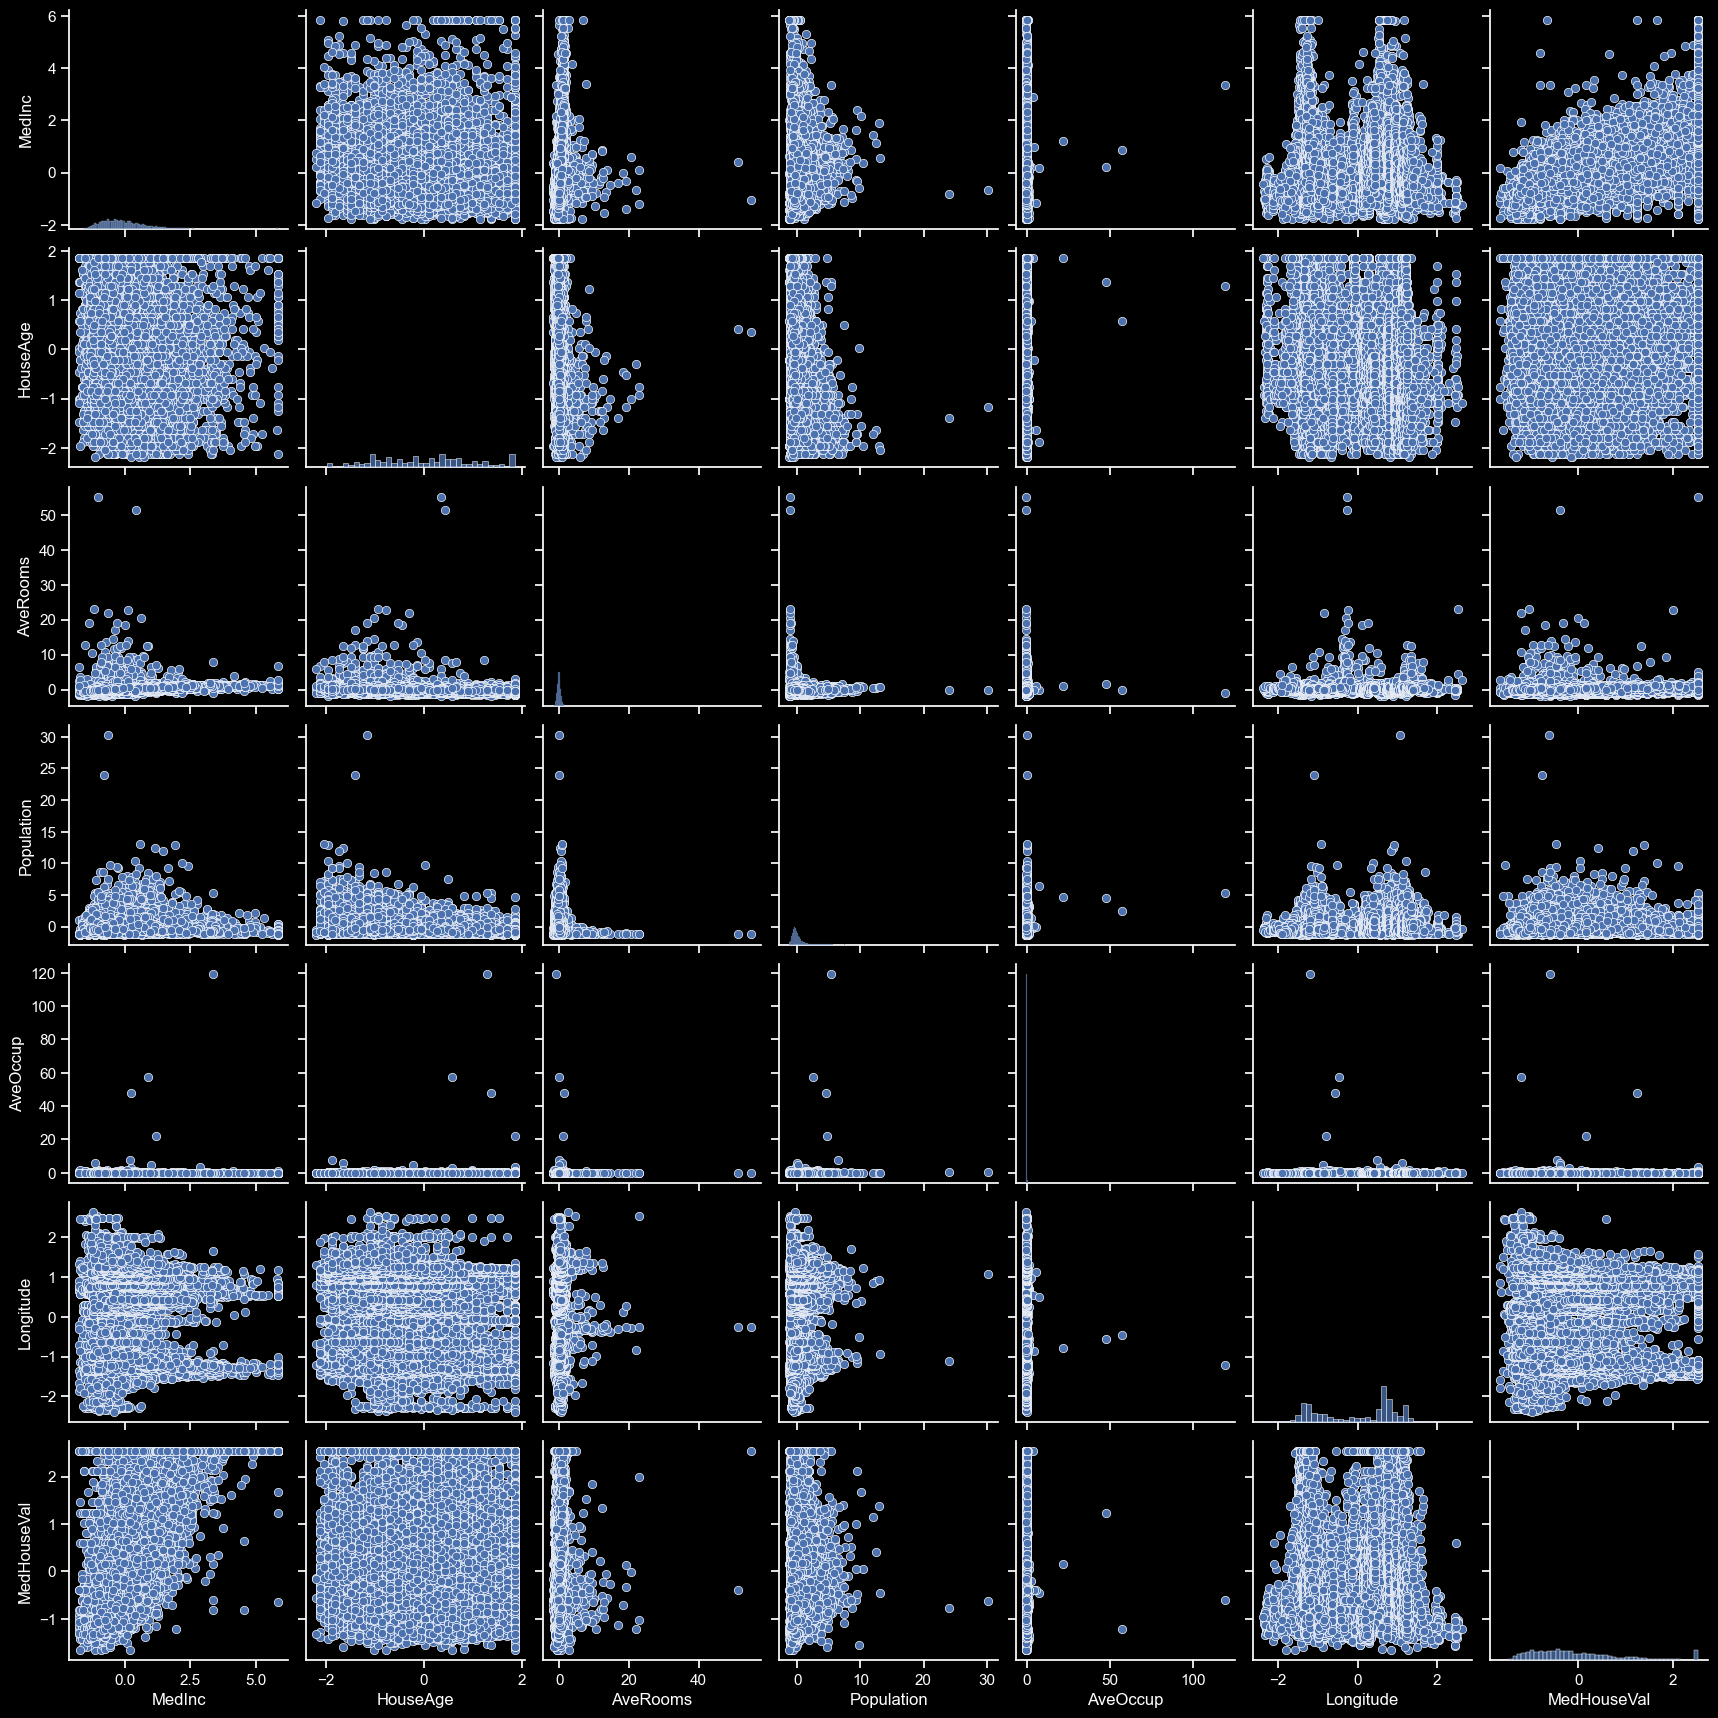

In [ ]:
sns.pairplot(df)

## 📊 Interpretation of results

As you can see the target column 'MedHouseVal' clearly has a weird looking distribution at its right tail. 📈

These are outliers that we cannot model together with the rest of data points. ⚠️

---

## ❓ What to do with outliers?
✂️ Drop them first, model the rest of dataset, then if needed, somehow model them separately.

For this course, we just drop them. Let's find out what selection to apply. The goal is to find a cutoff on the column that has outliers such that
1. outliers are removed
2. the least amount of data is lost

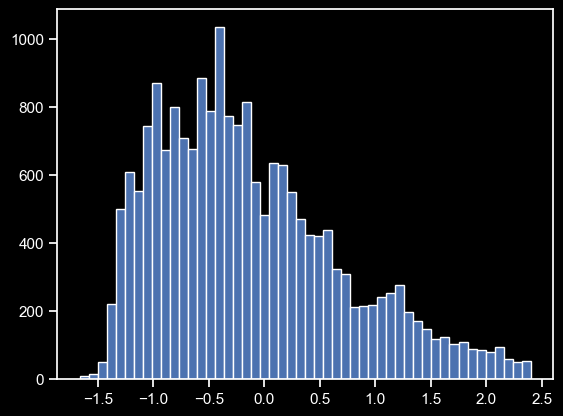

cutoff: 2.4





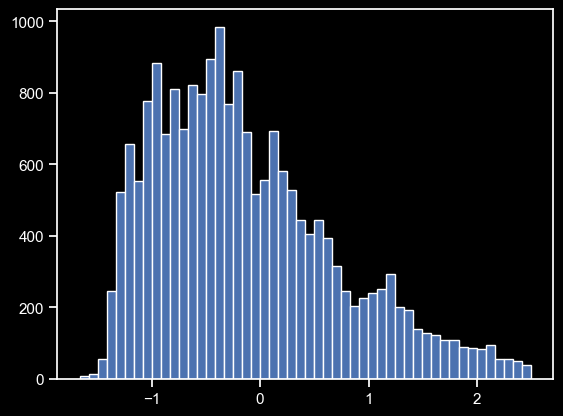

cutoff: 2.5





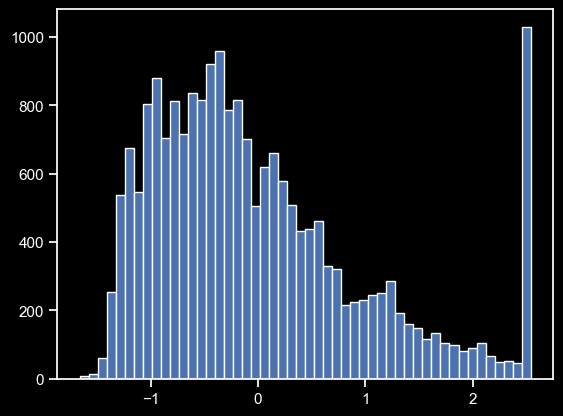

cutoff: 2.6





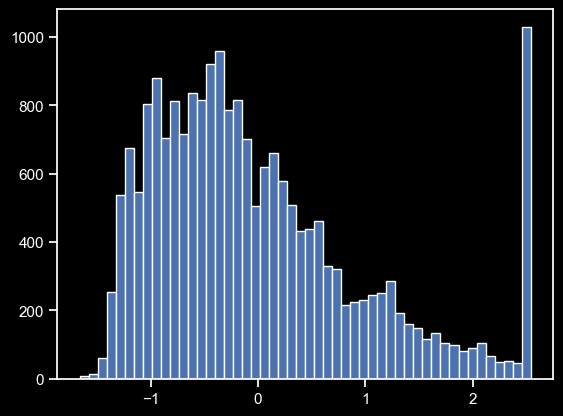

cutoff: 2.7





In [ ]:
## Look at histograms for different values of cutoffs
for cutoff in [2.4, 2.5, 2.6, 2.7]:
    ## selection rule
    mask = df["MedHouseVal"] < cutoff
    ## make a histogram of the target column with the selection applied
    plt.hist(df.loc[mask, "MedHouseVal"], bins=50)
    plt.show()
    print(f"cutoff: {cutoff}\n\n\n")

## 💡 Interpretation of results

As you can see from plots above, we can apply a cutoff of 2.5 (note that we are in a normalized unit-less frame), which is the largest that will also remove the outlier. 📊

So, let's re-define our dataset and move forward. ➡️

In [ ]:
## The selection to be applied
mask = df["MedHouseVal"] < 2.5

## final dataset after applying the selection
df = df[mask]

## ⚖️ Normalize again

Since our outlier handling dropped a bunch of rows of dataset, our dataset is no longer normalized. Let's normalize again.

In [ ]:
## normalize again
df = (df - df.mean()) / df.std()

---

## 🎲 Probability of the final dataset


After selecting features and removing outliers, let's finally look at the probability distribution of our dataset and what it actually tells us.

### The $\vec{\mu}$ & $\Sigma$

In [ ]:
## mu vector
mu = np.mean(df, axis=0)
mu

MedInc        -1.158356e-17
HouseAge       2.316712e-17
AveRooms      -1.158356e-17
Population    -5.791779e-18
AveOccup      -7.239724e-19
Longitude     -4.633424e-17
MedHouseVal   -2.316712e-17
dtype: float64

### Note:

these means are extremely small in numerical sense and can be safely assumed zero!

In [ ]:
## covariance of dataset
Sigma = np.cov(df.T)

### 🎲 Dataset's probability

Let's now insert the optimal values of $\vec{\mu}$ and $\Sigma$ into
$$
F = -\frac{1}{2} (\vec{x} - \vec{\mu}) \cdot \Sigma^{-1} \cdot (\vec{x} - \vec{\mu})
$$
and construct the probability distribution, i.e. the pdf, of our final dataset
$$
P = \frac{e^{-F}}{Z}
$$


In [ ]:
## Probability distribution (PDF) of multivariate Guassian (normal)
pdf = multivariate_normal(mean=mu, cov=Sigma).pdf

### 📊 Probability of rows of dataset

**If you take a row of your dataset and insert into $P$, it will tell you the chance of that row happening again.**

In [ ]:
## Print PDF (probability density) for the first 5 rows of the dataframe
for irow in range(5):
    # evaluate the multivariate normal PDF for row i (convert to 1D array with .values)
    x_vec = df.iloc[irow].values
    pdf_value = pdf(x_vec)
    print(f"Row {irow}:\nx-vector:{x_vec}\nPDF: {pdf_value:.2e}\n")

Row 0:
x-vector:[ 2.96779958  1.00987744  0.70803144 -0.97836243 -0.05088983 -1.32987622
  2.69759851]
PDF: 3.00e-06

Row 1:
x-vector:[ 2.95261506 -0.58940648  0.3827558   0.83818753 -0.09276325 -1.32489071
  1.72441855]
PDF: 7.46e-06

Row 2:
x-vector:[ 2.28653748  1.8894836   1.27662123 -0.82632794 -0.02771273 -1.33486173
  1.6582299 ]
PDF: 4.12e-06

Row 3:
x-vector:[ 1.25660545  1.8894836   0.19927976 -0.77215474 -0.0516048  -1.33984724
  1.54653656]
PDF: 5.38e-05

Row 4:
x-vector:[ 0.11017364  1.8894836   0.40181747 -0.76603841 -0.08603427 -1.33984724
  1.55584434]
PDF: 5.05e-05



---

## 🤖 Connecting to Machine Learning

Let's define two new variables
* $\vec{X}$: this is the vector $\vec{x}$ without the target column
* $y$: this is the target column of vector $\vec{x}$


### 🎯 Goal of linear regression
Linear regression is a supervised machine learning. That means, we will be given the values of the features, $\vec{X}$, and we need to predict the value of the target $y$

### ✂️ Split dataset to features and target
So we would like to split columns of our dataframe to $\vec{X}$ and $y$:


In [ ]:
# Target column's name
target_col = "MedHouseVal"

# Extract the features matrix
X = df.drop(columns=[target_col]).values

# Extract the target variable
y = df[target_col].values

## 🔎 Explore the objects

Let's take a look at what we have created 👀

In [ ]:
X

array([[ 2.96779958,  1.00987744,  0.70803144, -0.97836243, -0.05088983,
        -1.32987622],
       [ 2.95261506, -0.58940648,  0.3827558 ,  0.83818753, -0.09276325,
        -1.32489071],
       [ 2.28653748,  1.8894836 ,  1.27662123, -0.82632794, -0.02771273,
        -1.33486173],
       ...,
       [-1.25911343, -0.90926326, -0.06748863, -0.37983587, -0.07249014,
        -0.8263399 ],
       [-1.15243894, -0.82929907, -0.01343364, -0.6122564 , -0.09150743,
        -0.87619498],
       [-0.81978295, -0.98922746, -0.04604707, -0.04780653, -0.04511909,
        -0.83631092]], shape=(19629, 6))

In [ ]:
y

array([ 2.69759851,  1.72441855,  1.6582299 , ..., -1.02861551,
       -1.10721453, -1.05860724], shape=(19629,))

---

## 🔮 Predictive power of the probability distribution

Now things get interesting. We would like to plot for each row of dataset, the probability distribution of $y$ when the $\vec{X}$ is given.

We create a grid of y values. This ideally should be minus infinity to infinity. But, since probability is zero in extreme ranges, we keep the range shorter.

We then plot the probability for every value of y in this grid, keeping the $\vec{X}$ values as the given ones in that row.

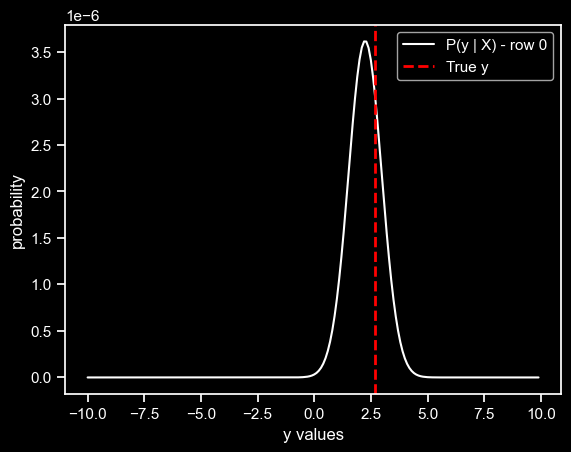

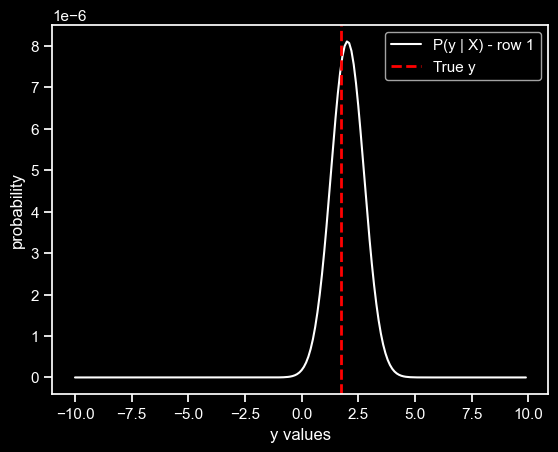

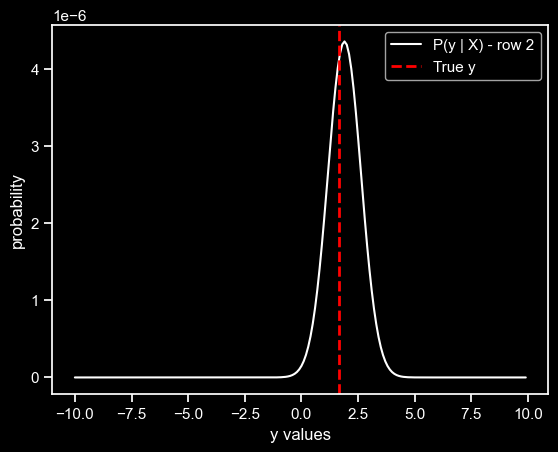

In [ ]:
## A function that takes the row index, replace its true y with the given y and
## return the probability of the the resulting x-vector
@np.vectorize
def p_y(irow, y_val):
    ## Concatenate the feature vector for the given row with the give y value
    return pdf(np.concatenate([X[irow, :], np.array([y_val])]))


## y-grid over which we will evaluate the p_y function above
y_grid = np.arange(-10, 10, 0.1)

## Plot PDF curves for a few rows
for irow in range(3):
    ## plot p_y
    plt.plot(y_grid, p_y(irow, y_grid), "white", label=f"P(y | X) - row {irow}")
    ## draw vertical line at the true y
    plt.axvline(x=y[irow], linestyle="--", linewidth=2, color="red", label="True y")
    plt.xlabel("y values")
    plt.ylabel("probability")
    plt.legend()
    plt.show()

## 💡 Interpretation of results

Our probability function seems to have a prediction power. The vertical red lines showing the true y values are always very close to the peak of the drawn probabilities.
Let's assume we are given a test feature set $\vec{X}$ whose true value is not known. We can make a similar plot, and take the location of the peak as the predicted value for the target $y$.

Note: We know that these peaks are the means of the distributions. These distributions are actually directly proportional with what we call the conditional probabilities of each row.

### 🌐 The unified view

🔍 In all machine learning models, we need to find $F$.
📈 Once we have it, we can use it (as in the plots above) to make predictions.

🧩 That means we only need to ask one question in any machine learning problem:

**How to find the optimal form of $F$ using data?**

---

## Conditional Probability

The supervised nature of linear regression requires a conditional probability.
In other words, we need the probability of $y$ under the condition that the values of $\vec{X}$ are given to us.


Here is the definition of conditional probability:
$$
P(y \mid X) = \frac{P(X, y)}{\int dy \, P(X, y)} = \frac{e^{-F}}{Z\int dy \, \frac{e^{-F}}{Z}} = \frac{e^{-F}}{\int dy \, e^{-F}}
$$
Note that in this equation $\vec{X}$ is not variable, the values are given. Therefore, the denominator is just a constant, the normalization constant of conditional probability,
$$
Z_c \equiv \int dy \, e^{-F}
$$

Computing this integral will be a bit cumbersome. However, there is a nice trick that we used above
$$
P(y \mid X) = \frac{e^{-F}}{Z_c}
$$
In other words, the conditional probability differs from the probability of the dataset (the joint probability) by just a constant. As a result, the shape of the distribution, including the location of the peaks, is what you see in the plots above.

## 📈 **Prediction in linear regression**

As we saw in the plots above, the expected (average) value of $ y $ given $ X $ gives our prediction:
$$
\hat{y} = \mathbb{E}[y \mid X] = \int dy \, y \, P(y \mid X)
$$
The hat is to distinguish the predicted y from the true y.

Performing the integration gives:
$$
\hat{y} = \beta_0 + \vec{\beta} \cdot \vec{X}
$$
This is what we know as the **linear regression equation**. In this equation:
- $ \beta_0 $: intercept
- $ \beta_i $: coefficients showing how much each feature influences the prediction

Although not needed, if the integral is worked out, $(\beta_0,\, \vec{\beta})$ will be expressed in terms of $(\vec{\mu},\, \Sigma)$.
**This will be training the model the hard way!** We will discuss it in future courses.

---

## ⚙️ Training the Model (the easy way)

📚 **This will be covered in detail in future courses.** For now, I will just give a quick overview.

🎯 The goal of training is to find the values of $ \beta_0, \beta_1, \dots, \beta_n $ that minimize the difference between predictions and actual data.

📊 In linear regression, this difference is often measured using the **Residual Sum of Squares (RSS)**:

$$
\text{RSS} = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

where $y_i$ are the true labels in our dataset and $\hat{y}_i$ are our predictions.

This RSS is called the **loss function**. To minimize the loss function, we need to take derivatives of it with respect to the free parameters $\beta_i$ and set those derivative to zero and solve the system of equations. The solution gives us the "best-fit" line. 📈 For linear regression, we can solve the equations analytically. In matrix form, the optimal coefficients are given by the following equation:

$$
\boldsymbol{\beta} = (X^T X)^{-1} X^T y
$$

All we need to do is to insert our dataset into the right hand side and find the optimal values of $\beta$. ✨

However, in most other machine learning models, analytic solutions are not practical. We instead use the numeric methods of solving the system of equations. 🔢
**Gradient Descent**, which will be discussed in detail in future courses, is the numeric method to train machine learning models and we will use it below. ⬇️


## 🏗️ Define the model

Instead of spending time implementing $\hat{y} = \beta_0 + \vec{\beta} \cdot \vec{X}$, we instead use scikit-learn library where most machine learning models are implemented. 📦

In [ ]:
# Create a LinearRegression model instance
model = LinearRegression()

## ✂️ Split dataset to train and test

To truly evaluate the performance of a machine learning model, we would like to test its predictions on unseen data. So, we split the dataset to train and test, train the model using the train set (usually %80 of the data). Then, we apply the model on the unseen %20 test dataset and observe the difference between the predictions and the true values. 📊

Also, since linear regression assumes no order in rows of dataset, we want to shuffle the rows to ensure no bias is added. 🔀

In [ ]:
# Split data into train (80%) and test (20%)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=42)

## 🚂 Train

In scikit-learn, the loss function of linear regression, i.e. $\text{RSS} = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$, is implemented. Moreover, we can call the gradient decent effortlessly to minimize this quantity and find the optimal values of $\beta_i$. 🎯

In [ ]:
# train using the 80% train set
model.fit(X_tr, y_tr)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## ✨ The optimal values

Let's now see what are the optimal values of $\beta_i$ for our housing data 🏠

In [ ]:
print(f"beta_0:\n{model.intercept_}")
print(f"\n[beta_1, beta_2, beta_3, beta_4]:\n{model.coef_}")

beta_0:
-0.001067376141697468

[beta_1, beta_2, beta_3, beta_4]:
[ 0.70431784  0.1978533  -0.06982016  0.04034414 -0.04240686 -0.02260176]


## 📊 Interpreting the Results Above

- **Positive coefficient:** as the feature increases, the target tends to increase.  
- **Negative coefficient:** as the feature increases, the target tends to decrease.  
- **Intercept:** the baseline prediction when all features are zero.

---

## 🔮 Prediction

After the training is done, we can use our model to predict. We usually predict on both train and test datasets although the test set is the true evaluation. However, sometimes the model is not even performing well on the train set. 📊

In [ ]:
# Predictions
y_pred_te = model.predict(X_te)  # for test dataset
y_pred_tr = model.predict(X_tr)  # for train dataset

## 📊 Visualize the performance

We can quickly see how our model is doing by plotting the true y values versus the predicted y values. 📈

We show the ideal scenario by a dashed line ➖

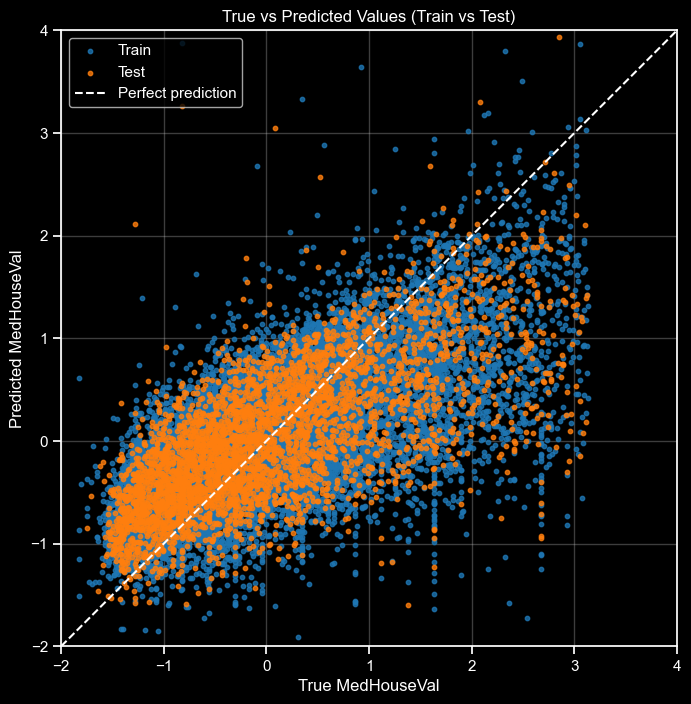

In [ ]:
# Scatter plot: True vs Predicted for train and test sets
plt.figure(figsize=(8, 8))
plt.scatter(y_tr, y_pred_tr, alpha=0.8, s=10, color="tab:blue", label="Train")
plt.scatter(y_te, y_pred_te, alpha=0.8, s=10, color="tab:orange", label="Test")

# Diagonal (perfect prediction) line and limits
_min = -2
_max = 4
plt.plot([_min, _max], [_min, _max], "w--", linewidth=1.5, label="Perfect prediction")

plt.xlabel("True MedHouseVal")
plt.ylabel("Predicted MedHouseVal")
plt.title("True vs Predicted Values (Train vs Test)")
plt.legend()
plt.grid(alpha=0.3)
plt.xlim(_min, _max)
plt.ylim(_min, _max)
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

## 💡 Interpretation of results

1. Points are tightly clustered along the dashed diagonal across the full range → overall a good predictive model.
>
2. We see systematic bowing/curvature → some relationships are non-linear or some features are missing; we can improve by considering a more complex model or adding new features.

---

## 🧪 Testing the Model

For any machine learning model, we have a bunch of **Evaluation Metrics** that can tell us how the model is performing. We pass them the unseen test dataset and they will return a score. 📊

For linear regression, the common metrics are: 📏

1. **MSE (Mean Squared Error):** 🎯  
  Equation:  
  $$
  \text{MSE} = \frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y}_i)^2
  $$  
  Range and interpretation:  
  - Domain: [0, +∞)  
  - Lower is better; 0 indicates perfect predictions. ✅

2. **MAE (Mean Absolute Error):** 📐  
  Equation:  
  $$
  \text{MAE} = \frac{1}{N}\sum_{i=1}^{N}\lvert y_i - \hat{y}_i\rvert
  $$  
  Range and interpretation:  
  - Domain: [0, +∞)  
  - Lower is better; more robust to outliers than MSE. 💪

3. **R² (Coefficient of Determination):** 🏆  
  Equation (common form):  
  $$
  R^2 = 1 - \frac{\sum_{i=1}^{N}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{N}(y_i - \bar{y})^2}
  $$  
  Range and interpretation:
  - Domain: [-∞, 1]  
  - 1 = perfect fit ⭐
  - 0 = model predicts no better than the mean 📊

In [ ]:
# Evaluate the already-trained model on the test set (and optionally train set for comparison)

# Metrics on test set
mse_te = mean_squared_error(y_te, y_pred_te)
mae_te = mean_absolute_error(y_te, y_pred_te)
r2_te = r2_score(y_te, y_pred_te)

# Metrics on train set (for comparison)
mse_tr = mean_squared_error(y_tr, y_pred_tr)
mae_tr = mean_absolute_error(y_tr, y_pred_tr)
r2_tr = r2_score(y_tr, y_pred_tr)

# Print results
print("=" * 60)
print("TEST SET PERFORMANCE")
print("=" * 60)
print(f"  MSE: {mse_te:.4f}")
print(f"  MAE: {mae_te:.4f}")
print(f"  R² : {r2_te:.4f}")

print("\n" + "=" * 60)
print("TRAIN SET PERFORMANCE (for comparison)")
print("=" * 60)
print(f"  MSE: {mse_tr:.4f}")
print(f"  MAE: {mae_tr:.4f}")
print(f"  R² : {r2_tr:.4f}")

# Optional: show a small table of actual vs predicted for the first 10 test samples
print("\nLast 10 test samples: Actual → Predicted")
for actual, pred in zip(y_te[-10:], y_pred_te[-10:]):
    print(f"  {actual:.3f} → {pred:.3f}")

TEST SET PERFORMANCE
  MSE: 0.5541
  MAE: 0.5662
  R² : 0.4722

TRAIN SET PERFORMANCE (for comparison)
  MSE: 0.5296
  MAE: 0.5531
  R² : 0.4636

Last 10 test samples: Actual → Predicted
  -0.216 → -0.362
  0.346 → 0.746
  0.488 → 0.877
  1.094 → -0.399
  -1.001 → -0.856
  -1.352 → -0.569
  -1.035 → -1.252
  -1.205 → -0.505
  -0.855 → -0.771
  1.160 → 0.081


## 💡 Interpretation of results


🏆 R² (test): This is the main goodness-of-fit signal. Closer to 1 is better.
- ✅ Our model's score on the test set is 0.47 which is in the reasonable/usable range (0.45–0.60)
    
📐 MSE/MAE (test): Because we re-normalized the target, these are in standard-deviation units of y.
- 🧮 RMSE = sqrt(MSE) ≈ typical error in “standard deviation of y”.
- 🎯 In our case, RMSE ≈ sqrt(0.55) ≈ 0.7 means predictions are, on average, ~0.7 standard deviations from the true value.
- 🤝 MAE is a more robust companion; MAE is typically ~0.8×RMSE for roughly Gaussian residuals.

🔁 Generalization check (train vs test):
- 🟩 Since R²_train ≈ R²_test ≈ 0.46 and both are in acceptable range → the model generalizes well.

In [ ]:
# @title
url = "https://compu-flair.com/notes/colab-ad/raw/"
MAKRDOWN = requests.get(url).text
display(Markdown(MAKRDOWN))

<div align="center">
      <img src="https://compu-flair.com/static/images/CompuFlairLogo.png" width="200">
</div>

## 🚀 Master Machine Learning
### 🎲 A Physics-inspired unified approach

🔗 Visit the program page: https://compu-flair.com/ml-for-physicists

👉 Here’s your roadmap: 
👣 Start from the top and move down, one row at a time:
1. 🚀 Take the Course on Google Colab.
2. 🎯 Run the Intermediate Project on Google Colab.
3. 🌟 Add complexities of professional setting to intermediate projects and prepare them for deployment:
    * Publish them on your GitHub and build your online presence.
    * Here is an [example advanced project](https://github.com/compu-flair/Kaggle_Advanced_House_Prices.git) ready for deployment.
    * In case you need help with an individual project, click "Get this Project Professionally SetUp"
4.  🎓 Want to learn it all & even more systematically? [Apply to our BootCamp](https://compu-flair.com/bootcamp)